In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Capgemini/electronics.csv")
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [ ]:
df.shape

(1292954, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [ ]:
df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [ ]:
df['brand'].unique()

array([nan, 'HP', 'Philips', 'Polaroid', 'Panasonic', 'JVC', 'Fujifilm',
       'Nikon', 'Kodak', 'Sony', 'Canon', 'Kensington', 'Pyle', 'Olympus',
       'Toshiba', 'Logitech', 'Etre Jeune', 'Linksys', 'Vivitar',
       'Sennheiser', 'Apple', 'Samsung', 'EldHus', 'Bose', 'Archos',
       'Garmin', 'Jabra', 'Gary Fong', 'ViewSonic', 'Savage', 'Uniden',
       'ebasy', 'Generic', 'JLAB', 'Skullcandy', 'TaoTronics', 'Neewer',
       'Koolertron', 'DURAGADGET', 'iRULU', 'Tiamat', 'DBPOWER', 'Fintie',
       'Plemo', 'EINCAR', 'Cooper Cases', 'LSS', 'Mpow', 'XShields',
       'IRULU', 'Funlux'], dtype=object)

In [ ]:
df.drop(['user_attr'],axis = 'columns' ,inplace=True)

In [ ]:
df["brand"].fillna( method ='ffill', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       1292940 non-null  object 
 7   year        1292954 non-null  int64  
 8   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 88.8+ MB


In [ ]:
df.corr()

,item_id,user_id,rating,year,split
item_id,1.000000,0.540537,-0.020450,0.834268,0.046491
user_id,0.540537,1.000000,-0.014239,0.476301,-0.126074
rating,-0.020450,-0.014239,1.000000,-0.008103,0.026575
year,0.834268,0.476301,-0.008103,1.000000,0.044871
split,0.046491,-0.126074,0.026575,0.044871,1.000000


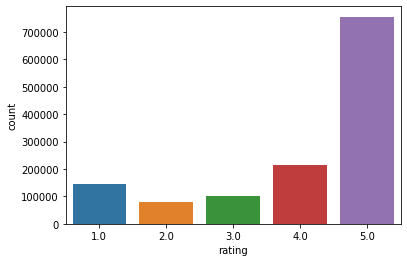

In [ ]:
sns.countplot(x ='rating', data = df)
plt.show()

In [ ]:
rating_count = pd.DataFrame(df.groupby('item_id')['rating'].count())
df1 = rating_count.sort_values('rating', ascending=False).head(10)
df1

,rating
item_id,
7780,28530
2031,9393
1575,8622
2279,6278
2486,5810
2340,5790
5795,5554
1715,5482
1124,5353


#These are the top 10 highest rated items.

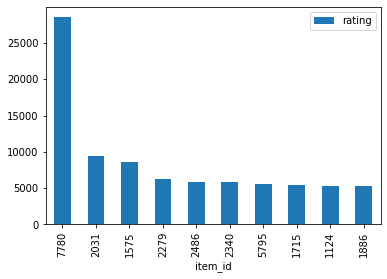

In [ ]:
ax = df1.plot.bar(stacked=True)

#Recommendation based on Brand 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


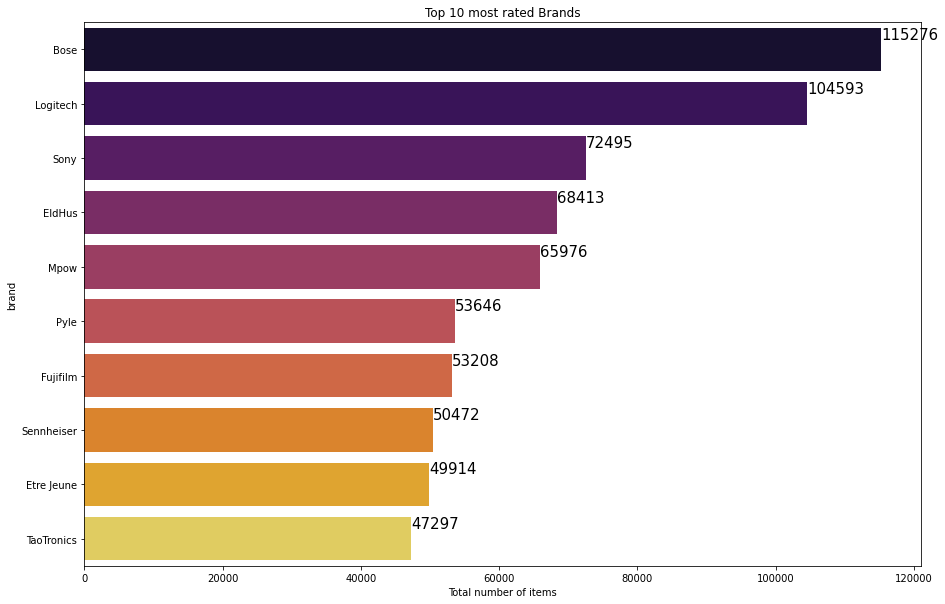

In [ ]:
most_items = df.groupby('brand')['item_id'].count().reset_index().sort_values('item_id', ascending=False).head(10).set_index('brand')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_items['item_id'], most_items.index, palette='inferno')
ax.set_title("Top 10 most rated Brands")
ax.set_xlabel("Total number of items")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
    


#Recommendations based on correlations

In [ ]:
average_rating = pd.DataFrame(df.groupby('item_id')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(df.groupby('item_id')['rating'].count())
df2 = average_rating.sort_values('ratingCount',ascending=False).head(10)
df2

,rating,ratingCount
item_id,,
7780,4.400911,28530
2031,4.418184,9393
1575,4.218743,8622
2279,4.168844,6278
2486,4.306368,5810
2340,4.625734,5790
5795,3.921318,5554
1715,4.797337,5482
1124,3.998879,5353


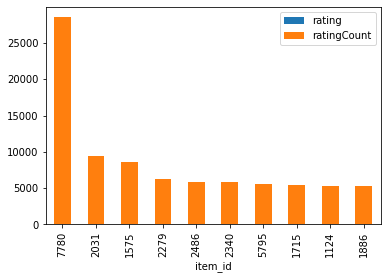

In [ ]:
ax = df2.plot.bar(stacked=True)

# Category based Recommendation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


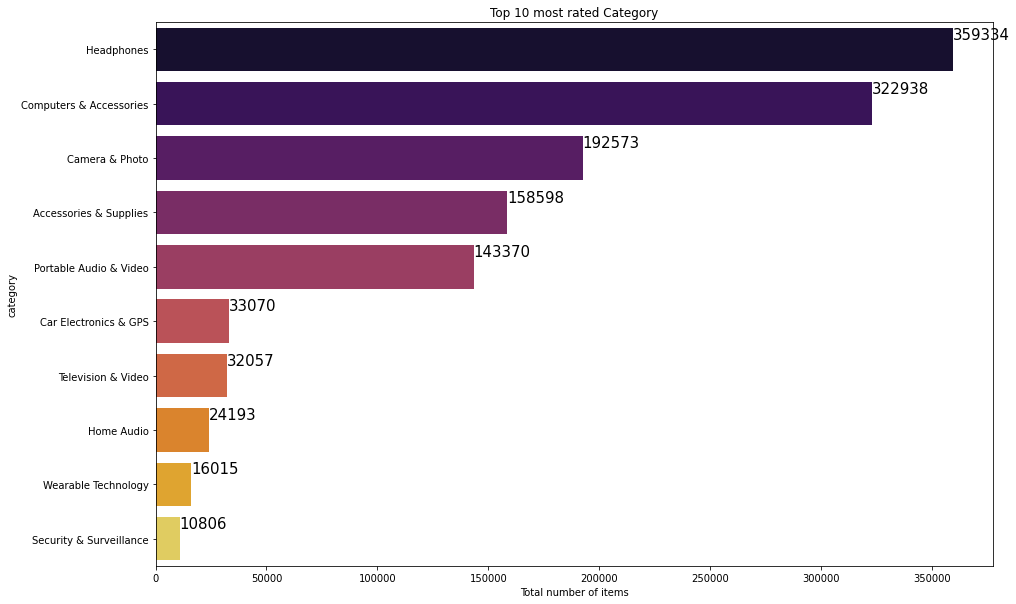

In [ ]:
most_items1 = df.groupby('category')['item_id'].count().reset_index().sort_values('item_id', ascending=False).head(10).set_index('category')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_items1['item_id'], most_items1.index, palette='inferno')
ax.set_title("Top 10 most rated Category")
ax.set_xlabel("Total number of items")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')

In [ ]:
combine_item_rating = df.copy()
columns = ['timestamp', 'model_attr','brand', 'year', 'split']
combine_item_rating = combine_item_rating.drop(columns, axis=1)
combine_item_rating.head(10)

,item_id,user_id,rating,category
0,0,0,5.0,Portable Audio & Video
1,0,1,5.0,Portable Audio & Video
2,0,2,3.0,Portable Audio & Video
3,0,3,1.0,Portable Audio & Video
4,0,4,2.0,Portable Audio & Video
5,0,5,2.0,Portable Audio & Video
6,0,6,5.0,Portable Audio & Video
7,0,7,2.0,Portable Audio & Video
8,0,8,4.0,Portable Audio & Video
9,0,9,5.0,Portable Audio & Video


In [ ]:
combine_item_rating = combine_item_rating.dropna(axis = 0, subset = ['category'])

item_ratingCount = (combine_item_rating.groupby(by = ['category'])['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['category', 'totalRatingCount']])
item_ratingCount.head(10)

,category,totalRatingCount
0,Accessories & Supplies,158598
1,Camera & Photo,192573
2,Car Electronics & GPS,33070
3,Computers & Accessories,322938
4,Headphones,359334
5,Home Audio,24193
6,Portable Audio & Video,143370
7,Security & Surveillance,10806
8,Television & Video,32057
9,Wearable Technology,16015


In [ ]:
rating_with_totalRatingCount = combine_item_rating.merge(item_ratingCount, left_on = 'category', right_on = 'category', how = 'left')
rating_with_totalRatingCount.head()


,item_id,user_id,rating,category,totalRatingCount
0,0,0,5.0,Portable Audio & Video,143370
1,0,1,5.0,Portable Audio & Video,143370
2,0,2,3.0,Portable Audio & Video,143370
3,0,3,1.0,Portable Audio & Video,143370
4,0,4,2.0,Portable Audio & Video,143370


In [ ]:
df3 = rating_with_totalRatingCount.join(df, lsuffix="DROP").filter(regex="^(?!.*DROP)")
df3.head()

,totalRatingCount,item_id,user_id,rating,timestamp,model_attr,category,brand,year,split
0,143370,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,0
1,143370,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,0
2,143370,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,0
3,143370,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,0
4,143370,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,0


#Recommendation Using **Nearst Neighbors**

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
user_rating = df3.drop_duplicates(['user_id','category'])
user_rating_pivot = user_rating.pivot(index = 'category', columns = 'user_id', values = 'rating').fillna(0)
user_rating_matrix = csr_matrix(user_rating_pivot.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index = np.random.choice(user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

4


In [ ]:
user_rating_pivot.index[query_index]

'Headphones'

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for who purchased {0}:\n'.format(user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with Score of {2}:'.format(i, user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for who purchased Headphones:

1: Computers & Accessories, with Score of 0.9505794460646725:
2: Accessories & Supplies, with Score of 0.9629696577827855:
3: Portable Audio & Video, with Score of 0.9673687668163331:
4: Camera & Photo, with Score of 0.9701039352681499:
